In [1]:
from sklearn import datasets, model_selection
from torch.nn import functional
import numpy as np
import matplotlib.pyplot as plt
from torchkit.data import DictDataset
import torch
from collections import OrderedDict
from torch import nn
from torchkit import net, model_selection
import logging
import sys

logging.basicConfig(stream=sys.stdout, level=logging.INFO)

d = datasets.load_digits()

In [2]:
images = np.transpose(d.images[..., np.newaxis], axes=[0, 3, 1, 2])
images.shape

(1797, 1, 8, 8)

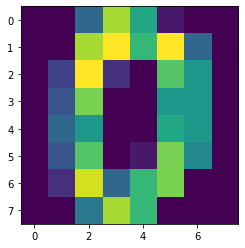

In [3]:
plt.imshow(images[0, ...].squeeze())

In [4]:
y = functional.one_hot(torch.from_numpy(d.target))
y

tensor([[1, 0, 0,  ..., 0, 0, 0],
        [0, 1, 0,  ..., 0, 0, 0],
        [0, 0, 1,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 1, 0],
        [0, 0, 0,  ..., 0, 0, 1],
        [0, 0, 0,  ..., 0, 1, 0]])

In [5]:
ds = DictDataset({'input': images}, target=y)
ds

In [6]:
model = nn.Sequential(OrderedDict([
    ('conv', nn.Conv2d(in_channels=1, out_channels=20, kernel_size=(3, 3), stride=(1, 1), padding=0)),
    ('maxpool', nn.MaxPool2d(kernel_size=(2, 2), stride=2)), 
    ('batchnorm', nn.BatchNorm2d(num_features=20)),
    ('flatten', nn.Flatten()),
    ('fc', nn.Linear(in_features=180, out_features=10)),
    ('softmax', nn.Softmax(dim=1)),
]))

print(model)

Sequential(
  (conv): Conv2d(1, 20, kernel_size=(3, 3), stride=(1, 1))
  (maxpool): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (batchnorm): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Linear(in_features=180, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)


In [7]:
clf = net.NeuralNetwork(
    model=model,
    do_validation=True,
    batch_size=32,
    learning_rate=1e-2,
    max_iter=100,
    do_early_stopping=True,
)

In [8]:
cv_results = model_selection.cross_validate(clf, ds)

INFO:root:StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
INFO:root:CV: fold 1 of 5
1437 360
INFO:root:Epoch: 1/100, time: 0.08s, train-loss: 9.6232e-02, validation-loss: 7.4900e-02
INFO:root:Epoch: 2/100, time: 0.07s, train-loss: 6.7541e-02, validation-loss: 5.7765e-02
INFO:root:Epoch: 3/100, time: 0.11s, train-loss: 4.9985e-02, validation-loss: 5.2400e-02
INFO:root:Epoch: 4/100, time: 0.08s, train-loss: 3.9725e-02, validation-loss: 4.8891e-02
INFO:root:Epoch: 5/100, time: 0.08s, train-loss: 3.3232e-02, validation-loss: 4.7184e-02
INFO:root:Epoch: 6/100, time: 0.08s, train-loss: 2.9070e-02, validation-loss: 4.6933e-02
INFO:root:Epoch: 7/100, time: 0.07s, train-loss: 2.5850e-02, validation-loss: 5.1799e-02
INFO:root:Epoch 7: Early stopping counter (1/10)
INFO:root:Epoch: 8/100, time: 0.07s, train-loss: 2.3034e-02, validation-loss: 4.9282e-02
INFO:root:Epoch 8: Early stopping counter (2/10)
INFO:root:Epoch: 9/100, time: 0.07s, train-loss: 2.0671e-02, validation-loss: 4.682

In [9]:
cv_results.score()

[{'confusion_matrix': array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
         [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  0],
         [ 0,  2, 33,  0,  0,  0,  0,  0,  1,  0],
         [ 0,  0,  0, 36,  0,  0,  0,  0,  0,  0],
         [ 0,  4,  0,  0, 30,  0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0, 34,  0,  0,  0,  1],
         [ 0,  0,  0,  0,  0,  0, 36,  0,  0,  0],
         [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  0],
         [ 0,  1,  0,  0,  0,  0,  0,  0, 33,  0],
         [ 0,  0,  1,  0,  0,  1,  0,  3,  1, 28]]),
  'balanced_accuracy_score': 0.9564565826330533,
  'matthews_corrcoef': 0.9530874459753221,
  'accuracy_score': 0.9573863636363636},
 {'confusion_matrix': array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
         [ 0, 34,  0,  0,  0,  0,  1,  0,  0,  0],
         [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
         [ 0,  0,  2, 30,  0,  1,  1,  0,  0,  2],
         [ 0,  3,  0,  0, 24,  0,  4,  2,  0,  0],
         [ 0,  0,  0,  1,  0, 31,  1,  0,  0,  3],
         